In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
%matplotlib inline

In [2]:
train_normal = pd.read_csv('./data/normal_training.csv')

In [3]:
test_faulty = pd.read_csv('./data/faulty_testing.csv')

In [4]:
# data preparing
df_train = train_normal[(train_normal.simulationRun>=1)].iloc[:500,3:]

df_test = train_normal[(train_normal.simulationRun>5)&(train_normal.simulationRun<10)].iloc[:,3:]
# IDV = 1
# df_test = test_faulty[(test_faulty.faultNumber==IDV) & 
#                                (test_faulty.simulationRun==1)].iloc[:,3:]

In [5]:
df_train.shape

(500, 52)

In [6]:
df_train

,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,xmeas_8,xmeas_9,xmeas_10,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,0.25038,3674.0,4529.0,9.2320,26.889,42.402,2704.3,74.863,120.41,0.33818,...,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
1,0.25109,3659.4,4556.6,9.4264,26.721,42.576,2705.0,75.000,120.41,0.33620,...,53.414,24.588,59.259,22.084,40.176,38.554,43.692,47.427,41.359,17.194
2,0.25038,3660.3,4477.8,9.4426,26.875,42.070,2706.2,74.771,120.42,0.33563,...,54.357,24.666,61.275,22.380,40.244,38.990,46.699,47.468,41.199,20.530
3,0.24977,3661.3,4512.1,9.4776,26.758,42.063,2707.2,75.224,120.39,0.33553,...,53.946,24.725,59.856,22.277,40.257,38.072,47.541,47.658,41.643,18.089
4,0.29405,3679.0,4497.0,9.3381,26.889,42.650,2705.1,75.388,120.39,0.32632,...,53.658,28.797,60.717,21.947,39.144,41.955,47.645,47.346,41.507,18.461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.24602,3651.9,4504.4,9.4721,26.600,42.312,2707.2,74.623,120.40,0.32381,...,54.132,23.663,59.588,22.481,38.952,33.489,45.203,49.900,41.057,16.448
496,0.23457,3663.0,4529.5,9.3440,26.872,42.434,2704.1,75.123,120.40,0.35454,...,54.028,22.776,60.566,22.237,42.978,38.017,42.637,50.075,41.339,17.435
497,0.23068,3656.4,4493.0,9.2978,26.920,42.536,2700.3,74.942,120.39,0.35859,...,54.465,23.158,62.102,21.639,42.483,41.016,46.782,50.098,41.277,18.315
498,0.24263,3632.5,4521.5,9.3915,26.956,42.317,2701.9,74.900,120.37,0.34057,...,54.532,23.386,63.164,22.661,39.558,37.892,47.468,50.312,40.557,19.198


In [7]:
df_train.T.shape

(52, 500)

In [8]:
mu_tr = df_train.mean(axis=0)
std_tr = df_train.std(axis=0)

In [9]:
X_tr = np.array(((df_train - mu_tr)/std_tr))

In [10]:
X_tr.shape

(500, 52)

In [11]:
X_tr = pd.DataFrame(X_tr)

In [12]:
X_tr

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,-0.007452,0.343515,0.501624,-1.429927,-0.084003,0.278264,-0.009547,-0.292480,0.510427,0.098332,...,-0.488447,0.000961,1.049039,-0.051767,-0.122613,1.318663,0.471088,-0.719850,0.279350,0.250147
1,0.017858,-0.103212,1.214437,1.034332,-0.865510,1.067806,0.107697,-0.032702,0.510427,-0.071306,...,-1.236243,-0.024128,-1.589009,-0.185720,0.049574,0.089034,-1.226377,-0.759744,0.460137,-0.634230
2,-0.007452,-0.075674,-0.820695,1.239687,-0.149128,-1.228219,0.308685,-0.466930,1.022904,-0.120142,...,0.900641,0.004234,0.029957,0.562396,0.098158,0.231278,0.029287,-0.740037,0.173742,1.720344
3,-0.029196,-0.045077,0.065155,1.683356,-0.693392,-1.259982,0.476176,0.392045,-0.514527,-0.128709,...,-0.030705,0.025687,-1.109583,0.302072,0.107446,-0.068218,0.380890,-0.648715,0.968488,-0.002532
4,1.549243,0.496503,-0.324826,-0.084979,-0.084003,1.403588,0.124446,0.703021,-0.514527,-0.917785,...,-0.683327,1.506313,-0.418150,-0.531976,-0.687757,1.198603,0.424319,-0.798676,0.725052,0.260028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-0.162872,-0.332695,-0.133709,1.613636,-1.428381,-0.130120,0.476176,-0.747566,-0.002050,-1.132832,...,0.390780,-0.360468,-1.324803,0.817665,-0.824935,-1.563413,-0.595413,0.428891,-0.080434,-1.160763
496,-0.571027,0.006940,0.514537,-0.010189,-0.163084,0.423467,-0.043045,0.200530,-0.002050,1.499991,...,0.155111,-0.682992,-0.539411,0.200975,2.051514,-0.086161,-1.666925,0.513004,0.424337,-0.464131
497,-0.709693,-0.195005,-0.428132,-0.595831,0.060204,0.886302,-0.679510,-0.142681,-0.514527,1.846979,...,1.145374,-0.544092,0.694087,-1.310421,1.697852,0.892257,0.063947,0.524059,0.313359,0.156980
498,-0.283714,-0.926291,0.307925,0.591932,0.227670,-0.107432,-0.411525,-0.222321,-1.539481,0.303098,...,1.297200,-0.461189,1.546936,1.272601,-0.391967,-0.126942,0.350407,0.626917,-0.975419,0.780208


In [13]:
X_ts = np.array(((df_test - mu_tr)/std_tr))

In [14]:
X_ts.shape

(2000, 52)

In [15]:
X_ts

array([[-0.01208568,  0.40776988,  0.23561043, ..., -0.78041164,
         0.10572277, -1.52566552],
       [ 0.09699346, -0.69986809, -0.58309113, ..., -0.77127939,
        -1.20095516, -2.03384709],
       [ 0.01322353,  0.1293305 , -0.72771979, ..., -0.73186651,
         1.79903418,  0.72727276],
       ...,
       [ 1.999462  , -0.13992956, -0.26025928, ...,  1.00470364,
        -1.02553812,  0.45694839],
       [ 0.15367183,  0.76882315,  0.7392281 , ...,  1.13832293,
         0.78412132, -1.57295464],
       [ 0.18361513,  0.05589594, -0.1337092 , ...,  1.13207455,
        -1.65560749,  0.72656695]])

## Training Process

In [16]:
# training proccess
A = X_tr
K = np.matmul(A, A.T)

C:\Users\m477a\AppData\Local\Temp/ipykernel_13236/2782355972.py:3: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  K = np.matmul(A, A.T)


In [17]:
K

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,11.232124,-1.004085,0.067264,-2.905314,7.166476,2.795394,0.005684,1.448061,0.405459,1.577030,...,0.591853,3.842471,-9.118121,4.283346,-3.392748,-10.650384,-3.097440,5.072833,-1.137402,-2.061092
1,-1.004085,15.616809,-1.640562,5.644505,2.585122,-0.439930,5.990194,4.597676,-2.429195,2.598958,...,0.908481,1.023661,-2.706448,0.153809,0.318730,8.123094,5.361986,-5.625153,-8.417085,-1.240515
2,0.067264,-1.640562,26.699551,17.842619,-0.313752,5.115206,3.047081,9.676234,-6.089012,3.920535,...,6.022803,5.870567,9.439036,-6.578546,5.755484,-1.733951,-1.246104,-3.112690,-1.142067,-3.645033
3,-2.905314,5.644505,17.842619,28.019440,-1.215484,1.026440,7.354669,7.863066,-6.383947,-0.043879,...,4.383819,5.620564,7.704904,0.810009,2.462522,7.425562,0.087649,-8.012049,-7.498938,1.317580
4,7.166476,2.585122,-0.313752,-1.215484,40.382322,34.714218,-1.696429,-4.656149,5.297251,4.018798,...,2.643440,6.909011,-7.384464,0.622754,1.253632,-2.803456,-0.029599,7.955240,-3.665204,2.656389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-10.650384,8.123094,-1.733951,7.425562,-2.803456,-4.689299,1.352422,-0.148598,3.508259,8.030400,...,-0.762517,-4.202477,3.454964,-6.705873,17.998134,40.382474,7.844551,-8.141296,4.945185,8.019860
496,-3.097440,5.361986,-1.246104,0.087649,-0.029599,-1.630370,-1.134954,0.501412,-8.119684,-5.749619,...,2.456229,2.052526,3.397583,-1.030407,-0.649532,7.844551,29.274803,19.147968,0.827270,-3.450679
497,5.072833,-5.625153,-3.112690,-8.012049,7.955240,2.708391,-6.143578,-6.828632,-4.196774,-12.126553,...,-2.614045,4.985756,6.697375,11.271496,-6.032084,-8.141296,19.147968,36.529806,9.390213,3.957249
498,-1.137402,-8.417085,-1.142067,-7.498938,-3.665204,-1.291069,-4.374695,-4.959638,2.190599,-4.837514,...,-4.130807,-8.844955,6.171358,-2.546988,6.338584,4.945185,0.827270,9.390213,33.924219,24.574407


In [18]:
#######
K = pd.DataFrame(K)

In [19]:
K.shape

(500, 500)

In [20]:
# K

In [21]:
s = (len(X_tr),len(X_tr))
unit = np.ones(s)/len(X_tr)

In [22]:
#######
unit = pd.DataFrame(unit)

In [23]:
unit.shape
# unit

(500, 500)

In [24]:
K_c = K-unit@K-K@unit+unit@K@unit

In [25]:
K_c.shape

(500, 500)

In [26]:
K_c

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,11.232124,-1.004085,0.067264,-2.905314,7.166476,2.795394,0.005684,1.448061,0.405459,1.577030,...,0.591853,3.842471,-9.118121,4.283346,-3.392748,-10.650384,-3.097440,5.072833,-1.137402,-2.061092
1,-1.004085,15.616809,-1.640562,5.644505,2.585122,-0.439930,5.990194,4.597676,-2.429195,2.598958,...,0.908481,1.023661,-2.706448,0.153809,0.318730,8.123094,5.361986,-5.625153,-8.417085,-1.240515
2,0.067264,-1.640562,26.699551,17.842619,-0.313752,5.115206,3.047081,9.676234,-6.089012,3.920535,...,6.022803,5.870567,9.439036,-6.578546,5.755484,-1.733951,-1.246104,-3.112690,-1.142067,-3.645033
3,-2.905314,5.644505,17.842619,28.019440,-1.215484,1.026440,7.354669,7.863066,-6.383947,-0.043879,...,4.383819,5.620564,7.704904,0.810009,2.462522,7.425562,0.087649,-8.012049,-7.498938,1.317580
4,7.166476,2.585122,-0.313752,-1.215484,40.382322,34.714218,-1.696429,-4.656149,5.297251,4.018798,...,2.643440,6.909011,-7.384464,0.622754,1.253632,-2.803456,-0.029599,7.955240,-3.665204,2.656389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-10.650384,8.123094,-1.733951,7.425562,-2.803456,-4.689299,1.352422,-0.148598,3.508259,8.030400,...,-0.762517,-4.202477,3.454964,-6.705873,17.998134,40.382474,7.844551,-8.141296,4.945185,8.019860
496,-3.097440,5.361986,-1.246104,0.087649,-0.029599,-1.630370,-1.134954,0.501412,-8.119684,-5.749619,...,2.456229,2.052526,3.397583,-1.030407,-0.649532,7.844551,29.274803,19.147968,0.827270,-3.450679
497,5.072833,-5.625153,-3.112690,-8.012049,7.955240,2.708391,-6.143578,-6.828632,-4.196774,-12.126553,...,-2.614045,4.985756,6.697375,11.271496,-6.032084,-8.141296,19.147968,36.529806,9.390213,3.957249
498,-1.137402,-8.417085,-1.142067,-7.498938,-3.665204,-1.291069,-4.374695,-4.959638,2.190599,-4.837514,...,-4.130807,-8.844955,6.171358,-2.546988,6.338584,4.945185,0.827270,9.390213,33.924219,24.574407


In [27]:
eigvls, eigvct = np.linalg.eig(K_c) # K_c

In [28]:
# eigvls : in eigen values will be use in the test
# eigvct : in eigen vector will be use in the train

In [29]:
eigvls.shape

(500,)

In [30]:
eigvct.shape

(500, 500)

In [31]:
eigvct = pd.DataFrame(eigvct)

In [32]:
eigvls = pd.DataFrame(eigvls)

In [33]:
eigvct.iloc[:,:16].shape

(500, 16)

In [34]:
score_train = np.matmul(K_c, eigvct.iloc[:,:16])

C:\Users\m477a\AppData\Local\Temp/ipykernel_13236/3867140423.py:1: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  score_train = np.matmul(K_c, eigvct.iloc[:,:16])


In [35]:
score_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,23.636699+0.000000j,-57.279895+0.000000j,6.801064+0.000000j,30.806849+0.000000j,-50.814370+0.000000j,-1.955729+0.000000j,34.524197+0.000000j,14.593350+0.000000j,6.863549+0.000000j,-22.900072+0.000000j,6.938265+0.000000j,-17.644885+0.000000j,-7.591499+0.000000j,-4.826965+0.000000j,-12.133394+0.000000j,2.605697+0.000000j
1,40.102482+0.000000j,-12.697157+0.000000j,-21.717631+0.000000j,-54.801203+0.000000j,-17.393027+0.000000j,-2.718521+0.000000j,-9.2363730+0.0000000j,-16.236679+0.000000j,-26.451816+0.000000j,34.433300+0.000000j,-4.423900+0.000000j,6.535509+0.000000j,-11.486906+0.000000j,6.267477+0.000000j,16.483242+0.000000j,-15.466668+0.000000j
2,33.511178+0.000000j,-15.030580+0.000000j,-39.952632+0.000000j,50.696472+0.000000j,-31.786993+0.000000j,70.919995+0.000000j,-10.517666+0.000000j,-8.584178+0.000000j,-25.149494+0.000000j,28.083124+0.000000j,-31.686992+0.000000j,14.442525+0.000000j,-9.902951+0.000000j,-25.954889+0.000000j,16.115659+0.000000j,17.916747+0.000000j
3,39.229991+0.000000j,-8.0639210+0.0000000j,-31.901260+0.000000j,8.980417+0.000000j,-0.297943+0.000000j,24.679360+0.000000j,-0.5232200+0.0000000j,1.688813+0.000000j,-42.613742+0.000000j,45.036306+0.000000j,-25.990627+0.000000j,-2.015544+0.000000j,7.085784+0.000000j,-13.975932+0.000000j,25.854975+0.000000j,13.988025+0.000000j
4,64.779742+0.000000j,-103.177162+0.000000j,-34.325690+0.000000j,25.367360+0.000000j,-43.613848+0.000000j,-50.611448+0.000000j,37.419015+0.000000j,29.734129+0.000000j,39.350490+0.000000j,12.156158+0.000000j,-5.094993+0.000000j,57.027711+0.000000j,8.750487+0.000000j,21.490044+0.000000j,-22.296649+0.000000j,21.561991+0.000000j
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,57.616349+0.000000j,86.367733+0.000000j,-31.370777+0.000000j,-41.223525+0.000000j,74.161684+0.000000j,-37.912696+0.000000j,-60.605938+0.000000j,3.447153+0.000000j,-28.887516+0.000000j,58.495358+0.000000j,-14.932260+0.000000j,-17.949819+0.000000j,31.383810+0.000000j,17.199088+0.000000j,14.451924+0.000000j,-15.537569+0.000000j
496,11.502497+0.000000j,86.899702+0.000000j,-0.532217+0.000000j,-83.894587+0.000000j,-8.985749+0.000000j,57.302800+0.000000j,35.065081+0.000000j,-26.631721+0.000000j,-16.444364+0.000000j,2.904475+0.000000j,-11.575437+0.000000j,-8.561507+0.000000j,14.589257+0.000000j,27.871799+0.000000j,3.417315+0.000000j,6.520795+0.000000j
497,-42.721295+0.000000j,41.969548+0.000000j,54.292086+0.000000j,-17.223082+0.000000j,-28.327301+0.000000j,47.942870+0.000000j,105.696016+0.000000j,11.900418+0.000000j,24.225741+0.000000j,-3.503348+0.000000j,-17.365393+0.000000j,-0.880877+0.000000j,20.098562+0.000000j,28.462241+0.000000j,-29.544152+0.000000j,9.583958+0.000000j
498,9.486255+0.000000j,20.438490+0.000000j,61.866810+0.000000j,36.634452+0.000000j,24.253080+0.000000j,18.548336+0.000000j,11.354000+0.000000j,-2.939992+0.000000j,49.028023+0.000000j,-2.356464+0.000000j,-15.509667+0.000000j,-25.506367+0.000000j,43.393306+0.000000j,10.924719+0.000000j,2.684610+0.000000j,-22.796027+0.000000j


In [36]:
score_train.shape

(500, 16)

In [37]:
eigvls

,0
0,3.700454e+03+0.000000e+00j
1,2.433701e+03+0.000000e+00j
2,1.455603e+03+0.000000e+00j
3,1.129258e+03+0.000000e+00j
4,1.043778e+03+0.000000e+00j
...,...
495,-2.701266e-15-5.009920e-15j
496,-1.114526e-14+1.397340e-15j
497,-1.114526e-14-1.397340e-15j
498,-6.711123e-15+0.000000e+00j


In [38]:
a = eigvls.iloc[:16,:]
b = np.zeros((16, 16), int)
np.fill_diagonal(b, a)

c:\users\m477a\appdata\local\programs\python\python39\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [39]:
# a.shape

In [40]:
# a

In [41]:
# b

In [42]:
invegvldiag = np.linalg.inv(b)

In [43]:
invegvldiag.shape

(16, 16)

In [44]:
# T2_train = np.matmul((score_train/eigvls.iloc[:16,:]),score_train.T)
T2_train = score_train@invegvldiag@score_train.T

In [45]:
T2_train.shape

(500, 500)

In [46]:
T2_tfinal = np.diag(T2_train)

In [47]:
T2_tfinal.shape

(500,)

In [48]:
T2_tfinal
# SUPOSETEDLY USING TEST DATA NOT TRAINING DATA IN HERE

array([ 8.13049311+0.j,  8.08556841+0.j, 16.24430444+0.j, 10.05931997+0.j,
       23.93515128+0.j, 35.53095842+0.j, 11.86190864+0.j, 16.28892614+0.j,
       28.96755151+0.j, 36.6400294 +0.j, 26.13815261+0.j, 18.72508523+0.j,
       13.39093062+0.j, 23.04078952+0.j, 29.95615616+0.j, 53.38529741+0.j,
       19.03721181+0.j, 28.45215216+0.j, 21.62540987+0.j, 19.82515211+0.j,
       21.37235584+0.j, 21.8309829 +0.j, 26.73865453+0.j, 25.00909794+0.j,
       35.3697451 +0.j, 32.63004047+0.j, 21.81412674+0.j, 22.0906965 +0.j,
       23.95394132+0.j, 19.17509118+0.j, 39.51381212+0.j, 37.10331939+0.j,
       26.58104231+0.j, 30.52302487+0.j, 34.87661342+0.j, 27.31026099+0.j,
       38.29348628+0.j, 33.85684143+0.j, 35.1740797 +0.j, 41.64130071+0.j,
       42.40412426+0.j, 45.07819345+0.j, 28.9532172 +0.j, 35.13964816+0.j,
       20.39580037+0.j, 54.31929501+0.j, 31.80249147+0.j, 49.35796103+0.j,
       26.23466918+0.j, 30.07853618+0.j, 42.47119841+0.j, 40.02316961+0.j,
       35.34928056+0.j, 3

In [49]:
X_tr.shape[0]

500

In [50]:
from scipy.stats import f
F = f.ppf(0.95, 16, df_train.shape[0]-16)
T2_trlim = ((16*(df_train.shape[0]**2-1))/(df_train.shape[0]*(df_train.shape[0]-16)))*F

In [51]:
T2_trlim

27.511202863723632

In [52]:
T2_lim = 16*((len(X_tr)-1)/(len(X_tr)-16))*F

In [53]:
T2_lim

27.456290283157315

c:\users\m477a\appdata\local\programs\python\python39\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


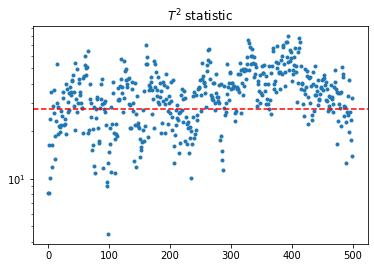

In [54]:
plt.semilogy(T2_tfinal,'.')
plt.axhline(T2_trlim, ls='--',c='r')
plt.title('$T^2$ statistic')
plt.show()

In [55]:
print(f'T2: {(T2_tfinal>T2_trlim).sum()/T2_tfinal.shape[0]}')
# ofcourse 100% because we using train and test in the same dataset

T2: 0.694


## Testing Process

In [56]:
X_ts.shape

(2000, 52)

In [57]:
X_tr.shape

(500, 52)

In [58]:
# linear kernel
# Kt = X_ts@df_train.T
Kt = X_ts@X_tr.T

In [59]:
Kt.shape

(2000, 500)

In [60]:
# Kt

In [61]:
Kt = Kt.reset_index(drop=True)

In [62]:
# centralize the kernel
st = (len(X_ts),len(X_tr)) # 2000 or 960
unit_t = np.ones(st)/len(df_train)

In [63]:
#######
unit_t = pd.DataFrame(unit_t)

In [64]:
unit_t

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
1,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
2,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
3,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
4,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
1996,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
1997,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
1998,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002


In [65]:
unit_t.shape

(2000, 500)

In [66]:
# unit_t

In [67]:
unit.shape

(500, 500)

In [68]:
# K

In [69]:
a = Kt

In [70]:
a

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.695639,2.623756,-2.681584,3.997612,-1.243795,-0.885361,4.799502,1.178033,-0.860980,1.262205,...,-6.981534,-0.402995,1.554334,7.084320,-5.609230,4.624945,-1.415091,-1.972167,-2.688193,-1.569975
1,-0.523094,1.887844,-7.711769,1.999139,6.058129,1.014034,-0.807084,-1.701939,5.986459,-6.903007,...,-1.498930,-2.257303,-3.744538,15.449094,-3.309535,4.759863,-4.952008,1.060290,1.520902,16.759107
2,4.842205,-4.254359,12.492652,13.846154,4.907164,0.816476,1.027335,-3.446869,-8.660779,3.763488,...,1.479031,4.307952,0.932493,8.184403,0.313187,-4.897660,-7.185245,-1.132882,-4.969765,10.013809
3,0.943712,9.613817,6.643203,12.540631,-3.057779,-8.944723,9.189780,10.857921,0.097814,-6.611868,...,-5.788340,-10.982317,4.946113,-2.907392,-1.397147,4.041435,7.177668,-5.254921,-6.212297,-12.732895
4,4.471688,6.088071,0.002204,-6.089401,12.805172,9.621391,0.322932,8.760770,2.089753,0.253627,...,6.724578,1.095127,-6.466120,-10.715815,8.111396,2.977447,1.423037,-0.003008,-1.212142,-3.336056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.782030,-5.087269,0.650057,0.682216,-1.369587,-1.645744,-0.993376,0.317070,-0.436350,-8.879605,...,-0.163876,-1.651991,-6.997626,-9.416193,1.687341,-0.404758,-3.893521,-1.752026,7.802322,4.502515
1996,-8.363253,7.368304,-7.912205,1.597145,0.996322,-3.226136,-2.028623,-7.769811,-0.551238,4.435573,...,-0.625231,4.531509,17.507241,15.937866,-1.914460,15.019301,7.916571,-1.357280,-2.530846,-2.831610
1997,-4.524898,-3.239447,-0.125769,-0.576866,12.512392,8.817264,-14.875086,-9.626081,5.108003,-1.266279,...,-3.771688,5.966198,21.363822,17.409025,-3.165359,-1.354441,-1.336142,11.121596,8.712929,22.623233
1998,-0.349497,4.392246,-0.122470,-1.003586,6.767990,2.477811,1.697030,3.194447,-24.603042,-11.623890,...,4.264971,17.778868,-15.191829,2.533775,-9.579838,-7.780960,12.699933,11.034951,-6.870324,-3.370758


In [71]:
b = unit_t@K

In [72]:
b

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,-4.872769e-13,-4.321266e-13,-8.997247e-13,4.587997e-13,5.258016e-13,3.220757e-13,4.120593e-13,-9.849482e-13,1.268263e-12,-1.950121e-12,...,-4.734546e-13,-1.917522e-12,3.371192e-13,-2.473577e-13,-8.965051e-14,1.233458e-13,8.049117e-14,2.970957e-13,1.226297e-12,4.296008e-13
1,-4.872769e-13,-4.321266e-13,-8.997247e-13,4.587997e-13,5.258016e-13,3.220757e-13,4.120593e-13,-9.849482e-13,1.268263e-12,-1.950121e-12,...,-4.734546e-13,-1.917522e-12,3.371192e-13,-2.473577e-13,-8.965051e-14,1.233458e-13,8.049117e-14,2.970957e-13,1.226297e-12,4.296008e-13
2,-4.872769e-13,-4.321266e-13,-8.997247e-13,4.587997e-13,5.258016e-13,3.220757e-13,4.120593e-13,-9.849482e-13,1.268263e-12,-1.950121e-12,...,-4.734546e-13,-1.917522e-12,3.371192e-13,-2.473577e-13,-8.965051e-14,1.233458e-13,8.049117e-14,2.970957e-13,1.226297e-12,4.296008e-13
3,-4.872769e-13,-4.321266e-13,-8.997247e-13,4.587997e-13,5.258016e-13,3.220757e-13,4.120593e-13,-9.849482e-13,1.268263e-12,-1.950121e-12,...,-4.734546e-13,-1.917522e-12,3.371192e-13,-2.473577e-13,-8.965051e-14,1.233458e-13,8.049117e-14,2.970957e-13,1.226297e-12,4.296008e-13
4,-4.872769e-13,-4.321266e-13,-8.997247e-13,4.587997e-13,5.258016e-13,3.220757e-13,4.120593e-13,-9.849482e-13,1.268263e-12,-1.950121e-12,...,-4.734546e-13,-1.917522e-12,3.371192e-13,-2.473577e-13,-8.965051e-14,1.233458e-13,8.049117e-14,2.970957e-13,1.226297e-12,4.296008e-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-4.872769e-13,-4.321266e-13,-8.997247e-13,4.587997e-13,5.258016e-13,3.220757e-13,4.120593e-13,-9.849482e-13,1.268263e-12,-1.950121e-12,...,-4.734546e-13,-1.917522e-12,3.371192e-13,-2.473577e-13,-8.965051e-14,1.233458e-13,8.049117e-14,2.970957e-13,1.226297e-12,4.296008e-13
1996,-4.872769e-13,-4.321266e-13,-8.997247e-13,4.587997e-13,5.258016e-13,3.220757e-13,4.120593e-13,-9.849482e-13,1.268263e-12,-1.950121e-12,...,-4.734546e-13,-1.917522e-12,3.371192e-13,-2.473577e-13,-8.965051e-14,1.233458e-13,8.049117e-14,2.970957e-13,1.226297e-12,4.296008e-13
1997,-4.872769e-13,-4.321266e-13,-8.997247e-13,4.587997e-13,5.258016e-13,3.220757e-13,4.120593e-13,-9.849482e-13,1.268263e-12,-1.950121e-12,...,-4.734546e-13,-1.917522e-12,3.371192e-13,-2.473577e-13,-8.965051e-14,1.233458e-13,8.049117e-14,2.970957e-13,1.226297e-12,4.296008e-13
1998,-4.872769e-13,-4.321266e-13,-8.997247e-13,4.587997e-13,5.258016e-13,3.220757e-13,4.120593e-13,-9.849482e-13,1.268263e-12,-1.950121e-12,...,-4.734546e-13,-1.917522e-12,3.371192e-13,-2.473577e-13,-8.965051e-14,1.233458e-13,8.049117e-14,2.970957e-13,1.226297e-12,4.296008e-13


In [73]:
c = Kt@unit

In [74]:
c

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,-9.777734e-13,-9.777734e-13,-9.777734e-13,-9.777734e-13,-9.777734e-13,-9.777734e-13,-9.777734e-13,-9.777734e-13,-9.777734e-13,-9.777734e-13,...,-9.777734e-13,-9.777734e-13,-9.777734e-13,-9.777734e-13,-9.777734e-13,-9.777734e-13,-9.777734e-13,-9.777734e-13,-9.777734e-13,-9.777734e-13
1,1.284528e-12,1.284528e-12,1.284528e-12,1.284528e-12,1.284528e-12,1.284528e-12,1.284528e-12,1.284528e-12,1.284528e-12,1.284528e-12,...,1.284528e-12,1.284528e-12,1.284528e-12,1.284528e-12,1.284528e-12,1.284528e-12,1.284528e-12,1.284528e-12,1.284528e-12,1.284528e-12
2,-4.412026e-13,-4.412026e-13,-4.412026e-13,-4.412026e-13,-4.412026e-13,-4.412026e-13,-4.412026e-13,-4.412026e-13,-4.412026e-13,-4.412026e-13,...,-4.412026e-13,-4.412026e-13,-4.412026e-13,-4.412026e-13,-4.412026e-13,-4.412026e-13,-4.412026e-13,-4.412026e-13,-4.412026e-13,-4.412026e-13
3,1.063732e-12,1.063732e-12,1.063732e-12,1.063732e-12,1.063732e-12,1.063732e-12,1.063732e-12,1.063732e-12,1.063732e-12,1.063732e-12,...,1.063732e-12,1.063732e-12,1.063732e-12,1.063732e-12,1.063732e-12,1.063732e-12,1.063732e-12,1.063732e-12,1.063732e-12,1.063732e-12
4,-4.197753e-13,-4.197753e-13,-4.197753e-13,-4.197753e-13,-4.197753e-13,-4.197753e-13,-4.197753e-13,-4.197753e-13,-4.197753e-13,-4.197753e-13,...,-4.197753e-13,-4.197753e-13,-4.197753e-13,-4.197753e-13,-4.197753e-13,-4.197753e-13,-4.197753e-13,-4.197753e-13,-4.197753e-13,-4.197753e-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,9.169696e-13,9.169696e-13,9.169696e-13,9.169696e-13,9.169696e-13,9.169696e-13,9.169696e-13,9.169696e-13,9.169696e-13,9.169696e-13,...,9.169696e-13,9.169696e-13,9.169696e-13,9.169696e-13,9.169696e-13,9.169696e-13,9.169696e-13,9.169696e-13,9.169696e-13,9.169696e-13
1996,-3.574085e-13,-3.574085e-13,-3.574085e-13,-3.574085e-13,-3.574085e-13,-3.574085e-13,-3.574085e-13,-3.574085e-13,-3.574085e-13,-3.574085e-13,...,-3.574085e-13,-3.574085e-13,-3.574085e-13,-3.574085e-13,-3.574085e-13,-3.574085e-13,-3.574085e-13,-3.574085e-13,-3.574085e-13,-3.574085e-13
1997,-7.430168e-14,-7.430168e-14,-7.430168e-14,-7.430168e-14,-7.430168e-14,-7.430168e-14,-7.430168e-14,-7.430168e-14,-7.430168e-14,-7.430168e-14,...,-7.430168e-14,-7.430168e-14,-7.430168e-14,-7.430168e-14,-7.430168e-14,-7.430168e-14,-7.430168e-14,-7.430168e-14,-7.430168e-14,-7.430168e-14
1998,-1.774303e-12,-1.774303e-12,-1.774303e-12,-1.774303e-12,-1.774303e-12,-1.774303e-12,-1.774303e-12,-1.774303e-12,-1.774303e-12,-1.774303e-12,...,-1.774303e-12,-1.774303e-12,-1.774303e-12,-1.774303e-12,-1.774303e-12,-1.774303e-12,-1.774303e-12,-1.774303e-12,-1.774303e-12,-1.774303e-12


In [75]:
d = unit_t@K@unit

In [76]:
d

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,...,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18
1,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,...,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18
2,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,...,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18
3,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,...,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18
4,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,...,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,...,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18
1996,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,...,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18
1997,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,...,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18
1998,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,...,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18,9.977587e-18


In [77]:
Kt_c = Kt-unit_t@K-Kt@unit+unit_t@K@unit
# the result are NaN

In [78]:
Kt_c

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.695639,2.623756,-2.681584,3.997612,-1.243795,-0.885361,4.799502,1.178033,-0.860980,1.262205,...,-6.981534,-0.402995,1.554334,7.084320,-5.609230,4.624945,-1.415091,-1.972167,-2.688193,-1.569975
1,-0.523094,1.887844,-7.711769,1.999139,6.058129,1.014034,-0.807084,-1.701939,5.986459,-6.903007,...,-1.498930,-2.257303,-3.744538,15.449094,-3.309535,4.759863,-4.952008,1.060290,1.520902,16.759107
2,4.842205,-4.254359,12.492652,13.846154,4.907164,0.816476,1.027335,-3.446869,-8.660779,3.763488,...,1.479031,4.307952,0.932493,8.184403,0.313187,-4.897660,-7.185245,-1.132882,-4.969765,10.013809
3,0.943712,9.613817,6.643203,12.540631,-3.057779,-8.944723,9.189780,10.857921,0.097814,-6.611868,...,-5.788340,-10.982317,4.946113,-2.907392,-1.397147,4.041435,7.177668,-5.254921,-6.212297,-12.732895
4,4.471688,6.088071,0.002204,-6.089401,12.805172,9.621391,0.322932,8.760770,2.089753,0.253627,...,6.724578,1.095127,-6.466120,-10.715815,8.111396,2.977447,1.423037,-0.003008,-1.212142,-3.336056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.782030,-5.087269,0.650057,0.682216,-1.369587,-1.645744,-0.993376,0.317070,-0.436350,-8.879605,...,-0.163876,-1.651991,-6.997626,-9.416193,1.687341,-0.404758,-3.893521,-1.752026,7.802322,4.502515
1996,-8.363253,7.368304,-7.912205,1.597145,0.996322,-3.226136,-2.028623,-7.769811,-0.551238,4.435573,...,-0.625231,4.531509,17.507241,15.937866,-1.914460,15.019301,7.916571,-1.357280,-2.530846,-2.831610
1997,-4.524898,-3.239447,-0.125769,-0.576866,12.512392,8.817264,-14.875086,-9.626081,5.108003,-1.266279,...,-3.771688,5.966198,21.363822,17.409025,-3.165359,-1.354441,-1.336142,11.121596,8.712929,22.623233
1998,-0.349497,4.392246,-0.122470,-1.003586,6.767990,2.477811,1.697030,3.194447,-24.603042,-11.623890,...,4.264971,17.778868,-15.191829,2.533775,-9.579838,-7.780960,12.699933,11.034951,-6.870324,-3.370758


In [79]:
score_test = np.matmul(Kt_c, eigvct.iloc[:,:16])

C:\Users\m477a\AppData\Local\Temp/ipykernel_13236/1658737890.py:1: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  score_test = np.matmul(Kt_c, eigvct.iloc[:,:16])


In [80]:
score_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,48.986185+0.000000j,-43.000811+0.000000j,5.874231+0.000000j,-48.593418+0.000000j,37.517242+0.000000j,-30.595904+0.000000j,24.872044+0.000000j,11.049553+0.000000j,-3.197241+0.000000j,6.284813+0.000000j,-2.056365+0.000000j,-25.411024+0.000000j,-18.793389+0.000000j,3.321802+0.000000j,-14.528369+0.000000j,5.007990+0.000000j
1,39.101332+0.000000j,-46.373946+0.000000j,37.837082+0.000000j,13.302047+0.000000j,51.335107+0.000000j,-98.306881+0.000000j,72.430942+0.000000j,-0.722137+0.000000j,-5.625187+0.000000j,36.541643+0.000000j,0.740024+0.000000j,13.214829+0.000000j,13.065204+0.000000j,-11.372910+0.000000j,42.814119+0.000000j,10.524816+0.000000j
2,10.017356+0.000000j,-44.587818+0.000000j,-42.942569+0.000000j,98.033223+0.000000j,-2.292424+0.000000j,5.079248+0.000000j,48.021144+0.000000j,26.203044+0.000000j,-52.794590+0.000000j,-14.303105+0.000000j,-26.879627+0.000000j,-21.777840+0.000000j,-3.588051+0.000000j,-4.778161+0.000000j,-4.131287+0.000000j,26.252974+0.000000j
3,22.166582+0.000000j,-16.903688+0.000000j,9.581668+0.000000j,-71.195820+0.000000j,-64.374067+0.000000j,58.072123+0.000000j,-54.939257+0.000000j,-24.799956+0.000000j,-1.975343+0.000000j,-8.059053+0.000000j,-3.237475+0.000000j,-20.237674+0.000000j,1.300619+0.000000j,4.894027+0.000000j,17.288586+0.000000j,20.392397+0.000000j
4,68.888131+0.000000j,-15.661973+0.000000j,-44.206002+0.000000j,12.577171+0.000000j,-57.052073+0.000000j,14.777123+0.000000j,-34.855930+0.000000j,7.103158+0.000000j,26.019001+0.000000j,26.176471+0.000000j,34.117252+0.000000j,24.533519+0.000000j,-18.120853+0.000000j,-4.057446+0.000000j,4.232035+0.000000j,44.523593+0.000000j
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-123.848038+0.000000j,-1.230412+0.000000j,33.960611+0.000000j,10.387350+0.000000j,-22.148284+0.000000j,-8.556023+0.000000j,-32.507783+0.000000j,11.559652+0.000000j,-12.978623+0.000000j,-10.808107+0.000000j,-6.196501+0.000000j,3.756838+0.000000j,42.579375+0.000000j,0.965985+0.000000j,2.608485+0.000000j,25.300619+0.000000j
1996,-131.042474+0.000000j,30.038711+0.000000j,-93.114298+0.000000j,-102.627275+0.000000j,26.696256+0.000000j,-43.564276+0.000000j,3.047225+0.000000j,-42.004391+0.000000j,-14.970583+0.000000j,13.844793+0.000000j,1.410435+0.000000j,-17.348525+0.000000j,51.574440+0.000000j,34.014492+0.000000j,-30.916686+0.000000j,20.197845+0.000000j
1997,-115.478037+0.000000j,8.008511+0.000000j,-52.763190+0.000000j,41.561459+0.000000j,-24.414626+0.000000j,-38.413247+0.000000j,65.908274+0.000000j,-22.129850+0.000000j,18.121809+0.000000j,35.270634+0.000000j,-21.665796+0.000000j,37.684984+0.000000j,70.454808+0.000000j,54.453507+0.000000j,-1.943017+0.000000j,28.643082+0.000000j
1998,-80.289196+0.000000j,8.043660+0.000000j,-28.505129+0.000000j,-75.761783+0.000000j,-64.671384+0.000000j,-30.452543+0.000000j,56.130746+0.000000j,33.535003+0.000000j,-68.709428+0.000000j,-8.696782+0.000000j,-45.584343+0.000000j,39.855856+0.000000j,13.336046+0.000000j,-11.842143+0.000000j,-5.179646+0.000000j,-32.751171+0.000000j


In [81]:
T2_test = score_test@invegvldiag@score_test.T

In [82]:
T2_test

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,8.737665+0.000000j,6.059376+0.000000j,-0.624068+0.000000j,-1.710140+0.000000j,-2.974467+0.000000j,4.602601+0.000000j,4.214573+0.000000j,4.188182+0.000000j,0.049609+0.000000j,-3.549030+0.000000j,...,3.987872+0.000000j,0.799982+0.000000j,3.264265+0.000000j,-5.296022+0.000000j,1.884573+0.000000j,-4.467418+0.000000j,4.048245+0.000000j,-4.697625+0.000000j,0.589270+0.000000j,-5.716099+0.000000j
1,6.059376+0.000000j,26.448288+0.000000j,3.380510+0.000000j,-12.364847+0.000000j,-4.337213+0.000000j,-0.513039+0.000000j,4.329561+0.000000j,12.830781+0.000000j,-0.284800+0.000000j,-1.384089+0.000000j,...,1.780098+0.000000j,-3.719455+0.000000j,1.141215+0.000000j,-12.483459+0.000000j,7.788583+0.000000j,-1.785352+0.000000j,-0.661054+0.000000j,8.713877+0.000000j,1.792220+0.000000j,2.074298+0.000000j
2,-0.624068+0.000000j,3.380510+0.000000j,21.064772+0.000000j,-7.272530+0.000000j,-0.726617+0.000000j,-5.097894+0.000000j,-0.189443+0.000000j,0.217372+0.000000j,-3.922326+0.000000j,-0.140781+0.000000j,...,0.819238+0.000000j,4.523449+0.000000j,0.363500+0.000000j,-2.644922+0.000000j,1.710708+0.000000j,0.521285+0.000000j,-6.640414+0.000000j,5.328899+0.000000j,1.666441+0.000000j,4.819932+0.000000j
3,-1.710140+0.000000j,-12.364847+0.000000j,-7.272530+0.000000j,18.232780+0.000000j,6.050323+0.000000j,1.466689+0.000000j,-5.423186+0.000000j,-6.448687+0.000000j,3.787201+0.000000j,4.332157+0.000000j,...,1.455443+0.000000j,-6.270291+0.000000j,-4.759597+0.000000j,5.570362+0.000000j,-6.124082+0.000000j,2.415347+0.000000j,2.394327+0.000000j,-7.502676+0.000000j,-0.250072+0.000000j,-4.132046+0.000000j
4,-2.974467+0.000000j,-4.337213+0.000000j,-0.726617+0.000000j,6.050323+0.000000j,16.383388+0.000000j,12.864476+0.000000j,-4.555332+0.000000j,-4.082491+0.000000j,-2.121996+0.000000j,2.448952+0.000000j,...,-4.814145+0.000000j,-2.946385+0.000000j,-7.590672+0.000000j,-0.597658+0.000000j,-9.428285+0.000000j,-1.032112+0.000000j,-4.485949+0.000000j,0.131957+0.000000j,-6.740269+0.000000j,-5.605631+0.000000j
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-4.467418+0.000000j,-1.785352+0.000000j,0.521285+0.000000j,2.415347+0.000000j,-1.032112+0.000000j,-3.644210+0.000000j,-1.835722+0.000000j,1.124363+0.000000j,0.715752+0.000000j,-0.218524+0.000000j,...,6.796399+0.000000j,5.148596+0.000000j,1.936940+0.000000j,5.268719+0.000000j,11.691123+0.000000j,11.513713+0.000000j,4.786850+0.000000j,7.274039+0.000000j,2.848327+0.000000j,7.395075+0.000000j
1996,4.048245+0.000000j,-0.661054+0.000000j,-6.640414+0.000000j,2.394327+0.000000j,-4.485949+0.000000j,0.451817+0.000000j,5.321719+0.000000j,2.813191+0.000000j,-7.784538+0.000000j,-8.550423+0.000000j,...,14.724509+0.000000j,6.123599+0.000000j,6.027144+0.000000j,-0.112678+0.000000j,13.416419+0.000000j,4.786850+0.000000j,34.980369+0.000000j,15.877255+0.000000j,9.283966+0.000000j,2.235818+0.000000j
1997,-4.697625+0.000000j,8.713877+0.000000j,5.328899+0.000000j,-7.502676+0.000000j,0.131957+0.000000j,-0.124862+0.000000j,-1.705904+0.000000j,2.719387+0.000000j,-8.884287+0.000000j,-8.008882+0.000000j,...,-1.532761+0.000000j,4.731570+0.000000j,-2.195964+0.000000j,0.653007+0.000000j,13.492731+0.000000j,7.274039+0.000000j,15.877255+0.000000j,34.298382+0.000000j,6.949470+0.000000j,9.452538+0.000000j
1998,0.589270+0.000000j,1.792220+0.000000j,1.666441+0.000000j,-0.250072+0.000000j,-6.740269+0.000000j,-1.569461+0.000000j,11.551085+0.000000j,4.801223+0.000000j,-0.947634+0.000000j,-1.557829+0.000000j,...,6.415934+0.000000j,2.410049+0.000000j,10.377021+0.000000j,15.340873+0.000000j,5.788049+0.000000j,2.848327+0.000000j,9.283966+0.000000j,6.949470+0.000000j,31.56088+0.00000j,7.409399+0.000000j


In [83]:
T2_test_final = np.diag(T2_test)

In [84]:
T2_test_final.shape

(2000,)

In [85]:
T2_test_final

array([ 8.73766509+0.j, 26.44828794+0.j, 21.06477215+0.j, ...,
       34.29838246+0.j, 31.56088039+0.j, 19.88621859+0.j])

In [86]:
T2_test_final.real

array([ 8.73766509, 26.44828794, 21.06477215, ..., 34.29838246,
       31.56088039, 19.88621859])

In [87]:
# T2_rd = round(T2_test_final, 4)
T2_rd = []
for data in T2_test_final:
    x = round(data.real, 2) # rounded 4
    T2_rd.append(x)

In [88]:
T2_rd = np.array(T2_rd)

In [89]:
type(T2_rd)

numpy.ndarray

c:\users\m477a\appdata\local\programs\python\python39\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


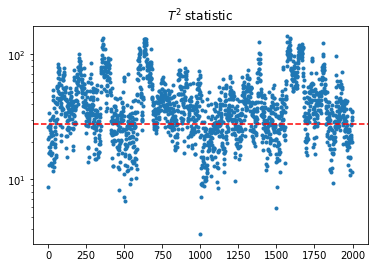

In [90]:
plt.semilogy(T2_test_final,'.')
plt.axhline(T2_trlim, ls='--',c='r')
plt.title('$T^2$ statistic')
plt.show()

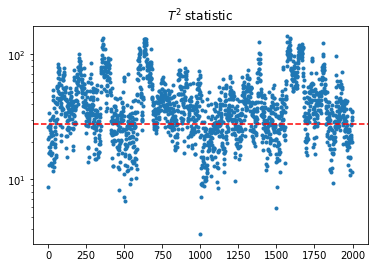

In [91]:
plt.semilogy(T2_test_final.real,'.')
plt.axhline(T2_trlim, ls='--',c='r')
plt.title('$T^2$ statistic')
plt.show()

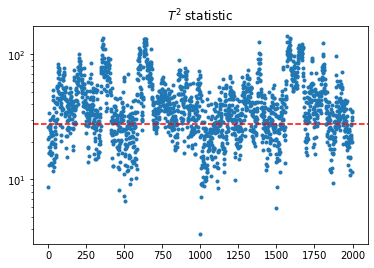

In [92]:
plt.semilogy(T2_rd,'.')
plt.axhline(T2_trlim, ls='--',c='r')
plt.title('$T^2$ statistic')
plt.show()

In [93]:
print(f'T2: {(T2_test_final>T2_trlim).sum()/T2_test_final.shape[0]}')

T2: 0.6965


### Reconstruct new Data

In [94]:
## Reconstruct New Data
# K_1 = score_train@score_train.T

In [95]:
# K_1_ = K_1

In [96]:
# K_1

In [97]:
# i = (500,500)
# ii = np.ones(i)

In [98]:
# K_1 = K_1+ii

In [99]:
# dual_coef = np.linalg.solve(K_1, A)

In [100]:
# dual_coef

In [101]:
# K_2 = K_1_

In [102]:
# newData = K_2@dual_coef

In [103]:
# newData
# newData.shape

In [104]:
# newData = pd.DataFrame(newData)

In [105]:
# newData.T.shape

In [106]:
# df_test.shape

In [107]:
# linear kernel
# Kt = np.matmul(df_test,newData.T)

In [108]:
# Kt

In [109]:
# Kt = Kt.reset_index(drop=True)

In [110]:
# Kt_c = Kt-unit_t@K-Kt@unit+unit_t@K@unit

In [111]:
# Kt_c

## Let's try with the np.linalg.eig(x)

In [112]:
npegvls, npegvtr = np.linalg.eig(K_c)

In [113]:
npegvls.shape

(500,)

In [114]:
npegvtr.shape

(500, 500)

# Make experimental Class

In [115]:
# from sklearn.preprocessing import StandardScaler, KernelCenterer
# from sklearn.utils import extmath
# from sklearn.metrics.pairwise import euclidean_distances

In [116]:
# class KPCA():
   
#     ###############

#     def __init__ (self, a = 0.9):
#         '''
#         Constructor: function called every time a PCA object is initialized
#         '''
#         # if 0<=a<1, 'a' indicates the desired explained variance fraction
#         # if a>=1, 'a' indicates the desired number of components
#         self.a = a
   
#     ###############

#     def fit(self, X, conf_Q = 0.99, conf_T2 = 0.99, plot = True):
#         '''
#         Model training function
#         '''
#         gamma = 0.01
        
#         # storing training averages and standard deviations
#         self.mu_train = X.mean(axis=0)
#         self.std_train = X.std(axis=0)
       
#         # normalizing training data
#         X = np.array(((X - self.mu_train)/self.std_train))
        
#         # Calculate euclidean distances of each pair of points in the data set
#         dist = euclidean_distances(X, X, squared=True)
        
#         # Calculate Gaussian kernel matrix
#         K = np.exp(-gamma * dist)

#         # centering kernel
#         Kc = KernelCenterer().fit_transform(K)
        
#         # calculating the covariance matrix of the data
# #         Cx = np.cov(X, rowvar=False)
        
#         # applying decomposition into eigenvalues ​​and eigenvectors
#         # https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html
#         self.L, self.P = np.linalg.eig(Kc)
        
#         # fractions of explained variance
#         fv = self.L/np.sum(self.L)
        
#         # fractions of accumulated explained variance
#         fva = np.cumsum(self.L)/sum(self.L)
       
#         # defining number of components
# #         if self.a>0 and self.a<1:
# #             self.a = np.where(fva>self.a)[0][0]+1
            
#         # calculating detection limits

#         # limit of the T^2 statistic
#         from scipy.stats import f
#         F = f.ppf(conf_T2, self.a, X.shape[0]-self.a)
#         self.T2_lim = ((self.a*(X.shape[0]**2-1))/(X.shape[0]*(X.shape[0]-self.a)))*F
        
#         # Q statistic limit
# #         theta = [np.sum(self.L[self.a:]**(i)) for i in (1,2,3)]
# #         ho = 1-((2*theta[0]*theta[2])/(3*(theta[1]**2)))
# #         from scipy.stats import norm
# #         nalpha = norm.ppf(conf_Q)
# #         self.Q_lim = (theta[0]*(((nalpha*np.sqrt(2*theta[1]*ho**2))/theta[0])+1+
# #                                 ((theta[1]*ho*(ho-1))/theta[0]**2))**(1/ho))
        
#         # plotting explained variances
#         if plot:
#             fig, ax = plt.subplots()
#             ax.bar(np.arange(len(fv)),fv)
#             ax.plot(np.arange(len(fv)),fva)
#             ax.set_xlabel('Number of components')
#             ax.set_ylabel('Data variance')
#             ax.set_title('PCA - Variance Explained');

#     ###############
            
#     def predict(self, X):
#         '''
#         Function for model testing
#         '''
#         gamma = 0.01
        
#         # normalizing test data (using training parameters!)
#         X = np.array((X - self.mu_train)/self.std_train)
        
#          # Calculate euclidean distances of each pair of points in the data set
#         dist = euclidean_distances(X, X, squared=True)
        
#         # Calculate Gaussian kernel matrix
#         K = np.exp(-gamma * dist)

#         # centering kernel
#         X = KernelCenterer().fit_transform(K)
        
#         # calculating T^2 statistic
# #         T = X@self.P[:,:self.a] # score matrix
#         T = X
# #         self.T2 = np.array([T[i,:]@np.linalg.inv(np.diag(self.L[:self.a]))@T[i,:].T for i in range (X.shape[0])])
#         self.T2 = np.array(T@np.linalg.inv(np.diag(self.P[:,:self.a]))@T.T )

# #         # calculating Q statistic
# #         e = X - X@self.P[:,:self.a]@self.P[:,:self.a].T
# #         self.Q = np.array([e[i,:]@e[i,:].T for i in range(X.shape[0])])
        
# #         # calculating contributions to Q
# #         self.c = np.absolute(X*e)
                
#     ###############

#     def plot_control_charts(self, fault = None):
#         '''
#         Function to plot control charts
#         '''
#         fig, ax = plt.subplots(1,2, figsize=(15,3))

#         ax[0].semilogy(self.T2,'.')
#         ax[0].axhline(self.T2_lim,ls='--',c='r');
#         ax[0].set_title('Control Letter $T^2$')
        
#         ax[1].semilogy(self.Q,'.')
#         ax[1].axhline(self.Q_lim,ls='--',c='r')
#         ax[1].set_title('Q Control Letter')
 
#         if fault is not None:
#             ax[0].axvline(fault, c='k')
#             ax[1].axvline(fault, c='k')

#     ###############
            
#     def plot_contributions(self, fault = None,
#                            index = None,
#                            columns = None):
#         '''
#         Function to plot contribution maps
#         '''
#         fig, ax = plt.subplots(figsize=(20, 6))
        
#         c = pd.DataFrame(self.c,
#                          index = index,
#                          columns = columns)
    
#         sns.heatmap(c, ax = ax,
#                     yticklabels=int(self.c.shape[0]/10),
#                     cmap = plt.cm.Blues);
        
#         ax.set_title('Partial contributions to Q')
        
#         if fault is not None:
#             ax.axhline(y=c.index[fault],
#                        ls='--', c='k')

In [117]:
# df_train = train_normal[(train_normal.simulationRun>=1)&
#                                  (train_normal.simulationRun<5)].iloc[:,3:]

# df_test = train_normal[(train_normal.simulationRun>5)&
#                                 (train_normal.simulationRun<10)].iloc[:,3:]

In [118]:
# kpca = KPCA(a = 16)
# kpca.fit(df_train)

In [119]:
# kpca.a

In [120]:
# kpca.predict(df_test)

In [121]:
# kpca.plot_control_charts()
# plt.suptitle('IDV(0)');

In [122]:
# print('False alarm rate\n--------------')

# print(f'T2: {(kpca.T2>kpca.T2_lim).sum()/kpca.T2.shape[0]}')
# print(f'Q: {(kpca.Q>kpca.Q_lim).sum()/kpca.Q.shape[0]}')

In [123]:
# IDV = 1

# df_test = test_faulty[(test_faulty.faultNumber==IDV) & 
#                                (test_faulty.simulationRun==1)].iloc[:,3:]

# kpca.predict(df_test)

# kpca.plot_control_charts(fault=160)
# plt.suptitle(f'IDV({IDV})');

In [124]:
x1 = np.arange(9.0).reshape((3, 3))
x2 = np.arange(9.0).reshape((3, 3))

In [125]:
x1.shape

(3, 3)

In [126]:
x1

array([[0., 1., 2.],
       [3., 4., 5.],
       [6., 7., 8.]])

In [127]:
x2

array([[0., 1., 2.],
       [3., 4., 5.],
       [6., 7., 8.]])

In [128]:
x1-x2

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [129]:
x3 = 81.1008646

In [130]:
x3 = round(x3, 4)

In [131]:
x3

81.1009